<a href="https://colab.research.google.com/github/RajeevRanjany/100DaysML/blob/main/Cats_v_Dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import kagglehub

In [65]:
path = kagglehub.dataset_download("karakaggle/kaggle-cat-vs-dog-dataset")


Using Colab cache for faster access to the 'kaggle-cat-vs-dog-dataset' dataset.


In [66]:
print("Dataset ka path:", path)


Dataset ka path: /kaggle/input/kaggle-cat-vs-dog-dataset


In [87]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization,Dropout

In [75]:
#Generators : divide data into batches

train_ds = keras.utils.image_dataset_from_directory(
    directory=dst, # Changed from 'path' to 'dst' to use the working directory
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,   # 20% val
    subset="training",
    seed=123
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory=dst, # Changed from 'path' to 'dst' to use the working directory
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,   # same split
    subset="validation",
    seed=123
)

Found 24953 files belonging to 2 classes.
Using 19963 files for training.
Found 24953 files belonging to 2 classes.
Using 4990 files for validation.


In [76]:
#Normalise : Pixels will be fit into range [0,1]
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=  train_ds.map(process)
validation_ds = validation_ds.map(process)

In [88]:
# Creating CNN model
model = Sequential()

# first convolution layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256,256,3)))

# adding Batch Normalisation to remove overfitting
model.add(BatchNormalization())

#first polling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))



# second convolution layer
model.add(Conv2D(64,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256,256,3)))

# adding Batch Normalisation to remove overfitting debugging
model.add(BatchNormalization())


#second polling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# third convolution layer
model.add(Conv2D(128,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256,256,3)))

# adding Batch Normalisation to remove overfitting debugging
model.add(BatchNormalization())


#third polling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())


model.add(Dense(128, activation='relu'))
# debugging
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
# debugging
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

In [89]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [90]:
#compile model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [91]:
#train the model
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 67s 97ms/step - accuracy: 0.5574 - loss: 3.0040 - val_accuracy: 0.6395 - val_loss: 0.6320
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.6623 - loss: 0.6294 - val_accuracy: 0.7433 - val_loss: 0.5190
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.7472 - loss: 0.5148 - val_accuracy: 0.7399 - val_loss: 0.4971
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.7966 - loss: 0.4479 - val_accuracy: 0.7788 - val_loss: 0.4616
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 55s 89ms/step - accuracy: 0.8313 - loss: 0.3816 - val_accuracy: 0.7880 - val_loss: 0.4573
Epoch 6/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.8624 - loss: 0.3214 - val_accuracy: 0.7623 - val_loss: 0.5174
Epoch 7/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.8961 - loss: 0.2529 - val_accuracy: 0.7764 - val_loss: 0.5334
Epoch 8/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.9305 - loss: 0.1814 - 

In [74]:
import os
import tensorflow as tf

dst = '/kaggle/working/PetImages'

print(f"Checking and cleaning directory: {dst}")

# Iterating through all subdirectories()'Cat', 'Dog')
for category in ['Cat', 'Dog']:
    category_path = os.path.join(dst, category)
    if not os.path.exists(category_path):
        print(f"Warning: Category path '{category_path}' does not exist. Skipping cleanup for this category.")
        continue

    print(f"Processing images in {category_path}...")
    files_in_category = os.listdir(category_path)
    for filename in files_in_category:
        filepath = os.path.join(category_path, filename)
        if os.path.isfile(filepath):
            try:

                img_bytes = tf.io.read_file(filepath)

                _ = tf.image.decode_image(img_bytes, channels=3)
            except Exception as e:
                print(f"Deleting corrupted or non-image file: {filepath} (Error: {e})")
                os.remove(filepath)
            else:
                # Also remove specific known problematic files like 'Thumbs.db'
                if filename.lower() == 'thumbs.db':
                    print(f"Deleting known non-image file: {filepath}")
                    os.remove(filepath)

print("Finished checking and cleaning dataset directory.")
print("Please re-run the cells for creating train_ds and validation_ds, and then this training cell.")

Checking and cleaning directory: /kaggle/working/PetImages
Processing images in /kaggle/working/PetImages/Cat...
Deleting corrupted or non-image file: /kaggle/working/PetImages/Cat/4351.jpg (Error: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input size should match (header_size + row_size * abs_height) but they differ by 2 [Op:DecodeImage] name: )
Processing images in /kaggle/working/PetImages/Dog...
Deleting corrupted or non-image file: /kaggle/working/PetImages/Dog/11912.jpg (Error: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Number of channels inherent in the image must be 1, 3 or 4, was 2 [Op:DecodeImage] name: )
Deleting corrupted or non-image file: /kaggle/working/PetImages/Dog/9500.jpg (Error: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Number of channels inherent in the image must be 1, 3 or 4, was 2 [Op:DecodeImage] name: )
Deleting

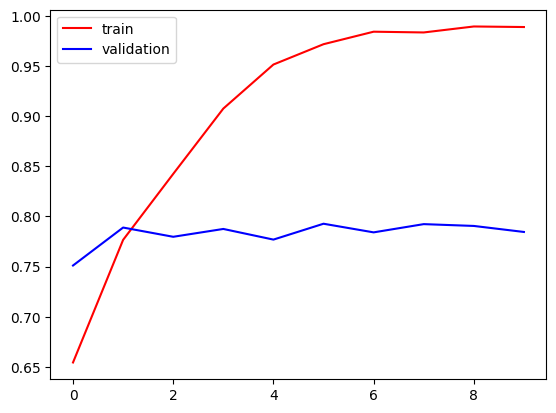

In [83]:
# graph accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()


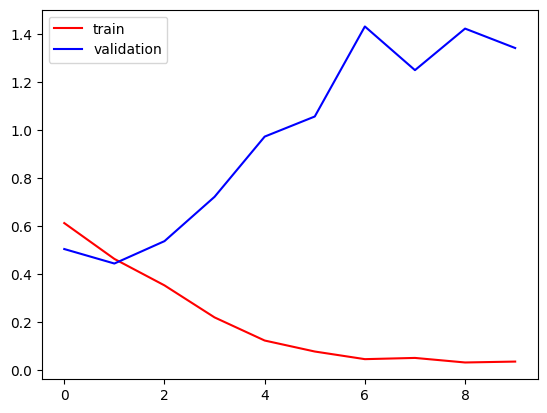

In [85]:
# validation loss and training losss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

Overfitting :

Ways to reduce Overfitting

Add more Data
Data Augmentation -> next model
l1/l2 regularizer
DropOut
Bach Norm
Reduce Complexity




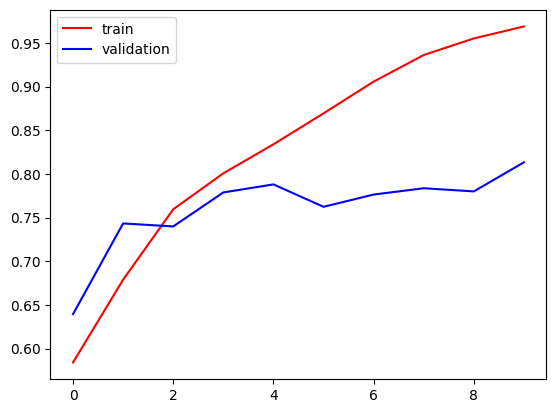

In [93]:
# graph accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()


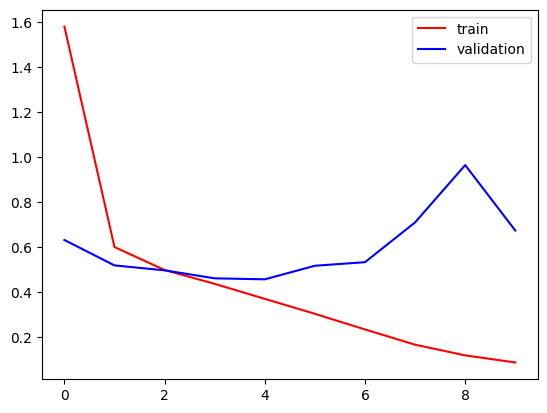

In [94]:
# validation loss and training losss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [97]:
#prediction
import cv2

In [131]:
test_img = cv2.imread('/content/cat.jpg')

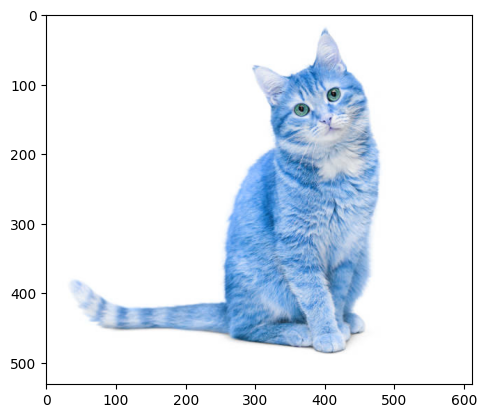

In [132]:
plt.imshow(test_img)

In [133]:
test_img.shape

(531, 612, 3)

In [134]:
test_img = cv2.resize(test_img,(256,256))

In [135]:
test_input = test_img.reshape((1,256,256,3))

In [136]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[8.620188e-21]], dtype=float32)